# Gunung Khantan Camera Trapping Data
This data are from my thesis which about the habitat association of Sumatran Serow (Capricornis sumatraensis) in the limestone outcrop in Gunung Khantan which located in Sungai Siput, Perak, Malaysia.


### What is Serow?
If you never heard about this creature named serow i can tell you a bit about it.
Serow have body shape like goat but it is not a goat!
Serow belongs to family Bovidae which is a cow family. 
The resemble of serow and cow family is their number of mammary glands.

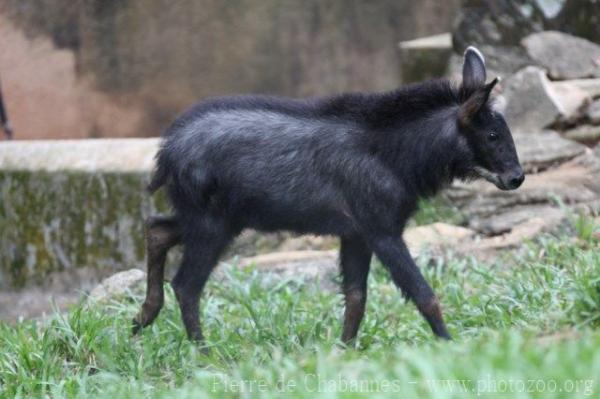


This data are actually result of merging 2 different table by the same column which is the camera trap which is:
 * the charactheristic of habitat around the located camere trap 
 * the species captured within the camera trap

The thesis study are focusing about the serow so the data for other species captured are not fully recorded so this data are **not perfect**


#### Import packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# plotting colors
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

#### Read in the khantan dataframe `csv` into a variable called `khantan_df`.

In [3]:
khantan_raw_df = pd.read_csv('khantan_camera_trap2.csv')

#### Check out the shape of the data set.

In [4]:
khantan_raw_df.shape

(439, 18)

In [5]:
khantan_raw_df.head()

,site,camera_trap,habitat_type,longitude_,latitude_,tree_height(m),canopy_cover(%),grass_cover(%),elevation(m),slope(°),aspect(°),ruggedness,serow detection,animal_cameratrap.camera_trap,animal_cameratrap.date,animal_cameratrap.species,animal_cameratrap.time,animal_cameratrap.individual
0,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,0.0,REC112,23/3/2019,Amaurornis phoenicurus,1:16:56 PM,1.0
1,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,0.0,REC112,24/3/2019,Amaurornis phoenicurus,3:52:51 PM,1.0
2,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,0.0,REC112,28/3/2019,Macaca fascicularis,4:52:51 PM,6.0
3,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,0.0,REC112,29/3/2019,Amaurornis phoenicurus,5:52:51 PM,1.0
4,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,0.0,REC112,30/3/2019,Amaurornis phoenicurus,6:52:51 PM,1.0


#### Remove unrelevant columns.
* deleting **serow detection** column because the data are bias. serow detection were collected from the whole **6171 camera trap sampling days** with **86 356 photo captures** while the other species where only for **80 camera trap days**
* deleting **animal_cameratrap.camera_trap** because it is similar with **camera_trap** because this csv are resulting from merging 2 table by the same column

In [6]:
#drop function to remove the column
#axis stand for column meaning only drop the column
mount_khantan_df= khantan_raw_df.drop(['serow detection','animal_cameratrap.camera_trap'], axis=1)

In [7]:
#to check the column are removed
mount_khantan_df.head()

,site,camera_trap,habitat_type,longitude_,latitude_,tree_height(m),canopy_cover(%),grass_cover(%),elevation(m),slope(°),aspect(°),ruggedness,animal_cameratrap.date,animal_cameratrap.species,animal_cameratrap.time,animal_cameratrap.individual
0,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,23/3/2019,Amaurornis phoenicurus,1:16:56 PM,1.0
1,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,24/3/2019,Amaurornis phoenicurus,3:52:51 PM,1.0
2,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,28/3/2019,Macaca fascicularis,4:52:51 PM,6.0
3,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,29/3/2019,Amaurornis phoenicurus,5:52:51 PM,1.0
4,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,30/3/2019,Amaurornis phoenicurus,6:52:51 PM,1.0


#### Find and remove null value row.

In [8]:
#is null stand for value that are null
mount_khantan_df['animal_cameratrap.species'].isnull().sum()

18

In [9]:
#dropna stand for drop the null value
#using subset as to only consider nulls in those columns
#inplace true as to change the data frame
mount_khantan_df.dropna(subset=['animal_cameratrap.species'], inplace=True)

In [10]:
#recheck the null have remove or not
mount_khantan_df['animal_cameratrap.species'].isnull().sum()

0

#### Find and rename column to be clear and neat

In [11]:
#use rename function to rename the column name
mount_khantan_df.rename(columns={'animal_cameratrap.date':'date','animal_cameratrap.species':'species',
                           'animal_cameratrap.time':'time','animal_cameratrap.individual':'ind_num'},inplace=True)

In [12]:
#renamed columns
mount_khantan_df.columns

Index(['site', 'camera_trap', 'habitat_type', 'longitude_', 'latitude_',
       'tree_height(m)', 'canopy_cover(%)', 'grass_cover(%)', 'elevation(m)',
       'slope(°)', 'aspect(°)', 'ruggedness', 'date', 'species', 'time',
       'ind_num'],
      dtype='object')

#### Rename the `species` column `'species'` with the following:
* PEAGON and PEAGONI : Columba domestica
* CROW : Corvus brachyrhynchos
* DOG : Canis lupus familiaris
* SQUIRREL : Ratufa bicolor
* LEOPARD CAT : Neofelis nebulosa

In [13]:
#the original unique value of the species
mount_khantan_df['species'].unique()

array(['Amaurornis phoenicurus', 'Macaca fascicularis',
       'Capricornis sumantraensis', 'PEAGON', 'Gallus gallus',
       'Viverra tangalunga', 'Varanus salvato', 'DOG', 'PEAGONI', 'CROW',
       'SQUIRREL', 'Sus scrofa', 'LEOPARD CAT'], dtype=object)

In [14]:
#use replace function to replace the species name
mount_khantan_df= mount_khantan_df.replace({'species': {'PEAGON' : 'Columba domestica','DOG': 'Canis lupus familiaris',
                                              'PEAGONI' : 'Columba domestica','CROW' : 'Corvus splendens',
                                              'DOG': 'Canis lupus familiaris','SQUIRREL' : 'Ratufa bicolor',
                                              'LEOPARD CAT' : 'Neofelis nebulosa'}})

In [15]:
#recheck and replaced
mount_khantan_df['species'].unique()

array(['Amaurornis phoenicurus', 'Macaca fascicularis',
       'Capricornis sumantraensis', 'Columba domestica', 'Gallus gallus',
       'Viverra tangalunga', 'Varanus salvato', 'Canis lupus familiaris',
       'Corvus splendens', 'Ratufa bicolor', 'Sus scrofa',
       'Neofelis nebulosa'], dtype=object)

## Nice and clean dataframe

#### 1. Give common name of each species

In [16]:
#function to give common name to each species by the species_dict
def sp_common_name(species): 
    species_dict = {
        'Amaurornis phoenicurus':'White-breasted waterhen',
        'Macaca fascicularis':'Long-tailed macaque',
        'Capricornis sumantraensis':'Sumantran serow', 
        'Columba domestica':'Domestic pigeon', 
        'Gallus gallus':'Chicken',
        'Viverra tangalunga':'Malayan civet', 
        'Varanus salvato':'Asian water monitor', 
        'Canis lupus familiaris':'Domestic dog',
        'Corvus splendens':'House crow', 
        'Ratufa bicolor':'Malayan giant squirrel', 
        'Sus scrofa':'Wild boar',
        'Neofelis nebulosa':'Leopard cat'
    }
    
    try:
        return species_dict[species]
    except:
        return 'N'

In [17]:
#find common name for macaca
sp_common_name('Macaca fascicularis')

'Long-tailed macaque'

In [18]:
#apply the funvtion in the data frame
mount_khantan_df['common_name']= mount_khantan_df['species'].apply(sp_common_name)
mount_khantan_df.head()

,site,camera_trap,habitat_type,longitude_,latitude_,tree_height(m),canopy_cover(%),grass_cover(%),elevation(m),slope(°),aspect(°),ruggedness,date,species,time,ind_num,common_name
0,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,23/3/2019,Amaurornis phoenicurus,1:16:56 PM,1.0,White-breasted waterhen
1,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,24/3/2019,Amaurornis phoenicurus,3:52:51 PM,1.0,White-breasted waterhen
2,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,28/3/2019,Macaca fascicularis,4:52:51 PM,6.0,Long-tailed macaque
3,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,29/3/2019,Amaurornis phoenicurus,5:52:51 PM,1.0,White-breasted waterhen
4,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,30/3/2019,Amaurornis phoenicurus,6:52:51 PM,1.0,White-breasted waterhen


#### rearrage columns to make the data more neat

In [19]:
#check the columns arragement
mount_khantan_df.columns

Index(['site', 'camera_trap', 'habitat_type', 'longitude_', 'latitude_',
       'tree_height(m)', 'canopy_cover(%)', 'grass_cover(%)', 'elevation(m)',
       'slope(°)', 'aspect(°)', 'ruggedness', 'date', 'species', 'time',
       'ind_num', 'common_name'],
      dtype='object')

In [20]:
#replace with new arragement
mount_khantan_df= mount_khantan_df[['site', 'camera_trap', 'habitat_type', 'longitude_', 'latitude_',
       'tree_height(m)', 'canopy_cover(%)', 'grass_cover(%)', 'elevation(m)',
       'slope(°)', 'aspect(°)', 'ruggedness', 'date', 'time',
       'ind_num', 'species', 'common_name']]

In [21]:
mount_khantan_df.head()

,site,camera_trap,habitat_type,longitude_,latitude_,tree_height(m),canopy_cover(%),grass_cover(%),elevation(m),slope(°),aspect(°),ruggedness,date,time,ind_num,species,common_name
0,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,23/3/2019,1:16:56 PM,1.0,Amaurornis phoenicurus,White-breasted waterhen
1,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,24/3/2019,3:52:51 PM,1.0,Amaurornis phoenicurus,White-breasted waterhen
2,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,28/3/2019,4:52:51 PM,6.0,Macaca fascicularis,Long-tailed macaque
3,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,29/3/2019,5:52:51 PM,1.0,Amaurornis phoenicurus,White-breasted waterhen
4,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,30/3/2019,6:52:51 PM,1.0,Amaurornis phoenicurus,White-breasted waterhen


#### 2. Calculate the relative abundance index of each species
Relative abundanced index is the evenness distribution of individuals among species in a community.

Total Number of Individual species (Isi) divided by Total Number of Species Population ( ∑ Nsi) multiply by one hundred (100)

In [22]:
#to see what species we have again
mount_khantan_df['common_name'].value_counts()

Wild boar                  171
White-breasted waterhen     92
Sumantran serow             77
Long-tailed macaque         44
Malayan giant squirrel       8
Malayan civet                6
Leopard cat                  6
Chicken                      5
House crow                   5
Domestic pigeon              3
Domestic dog                 2
Asian water monitor          2
Name: common_name, dtype: int64

In [23]:
#to find the total individual in each species
mount_khantan_df[mount_khantan_df['common_name']== 'Long-tailed macaque']['ind_num'].sum()

106.0

In [24]:
#to find the total of species in the data frame
mount_khantan_df['common_name'].nunique()

12

In [29]:
def rai(common_name):
    total_individual = mount_khantan_df[mount_khantan_df['common_name']== common_name]['ind_num'].sum()
    total_species = mount_khantan_df['common_name'].nunique()
    relative_abundance = (total_individual/total_species)*100
    return relative_abundance

In [30]:
rai('Malayan civet')

50.0

In [31]:
#apply function int the data frame
mount_khantan_df['relative_abundance_index'] = mount_khantan_df['common_name'].apply(rai)

In [32]:
mount_khantan_df.head()

,site,camera_trap,habitat_type,longitude_,latitude_,tree_height(m),canopy_cover(%),grass_cover(%),elevation(m),slope(°),aspect(°),ruggedness,date,time,ind_num,species,common_name,relative_abundance_index
0,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,23/3/2019,1:16:56 PM,1.0,Amaurornis phoenicurus,White-breasted waterhen,816.666667
1,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,24/3/2019,3:52:51 PM,1.0,Amaurornis phoenicurus,White-breasted waterhen,816.666667
2,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,28/3/2019,4:52:51 PM,6.0,Macaca fascicularis,Long-tailed macaque,883.333333
3,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,29/3/2019,5:52:51 PM,1.0,Amaurornis phoenicurus,White-breasted waterhen,816.666667
4,Disturbed 2,REC112,disturbed area,107.11402,4.76862,15.0,20,10,89.768,0.0,0.0,0.0,30/3/2019,6:52:51 PM,1.0,Amaurornis phoenicurus,White-breasted waterhen,816.666667


In [33]:
#to see the relative abundance index in each species
mount_khantan_df[['common_name','relative_abundance_index']].groupby(by='common_name').max() \
  .sort_values('relative_abundance_index', ascending=False)

,relative_abundance_index
common_name,
Wild boar,2275.000000
Long-tailed macaque,883.333333
White-breasted waterhen,816.666667
Sumantran serow,708.333333
Malayan giant squirrel,66.666667
Chicken,50.000000
Leopard cat,50.000000
Malayan civet,50.000000
House crow,41.666667


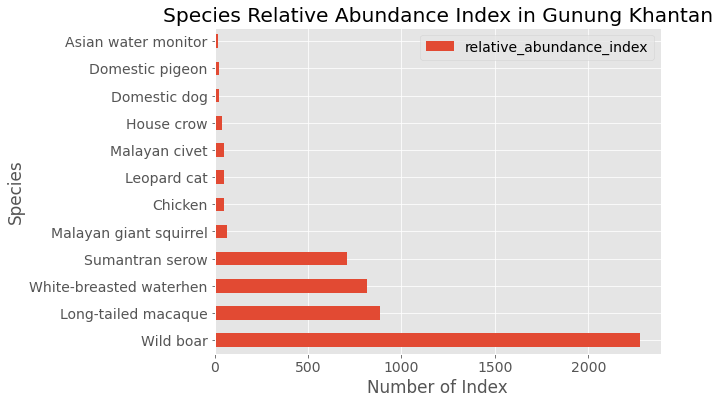

In [34]:
#plot a bar graph
mount_khantan_df[['common_name','relative_abundance_index']].groupby(by='common_name').max() \
  .sort_values('relative_abundance_index', ascending=False).plot(kind='barh')
plt.ylabel('Species')
plt.xlabel('Number of Index')
plt.title('Species Relative Abundance Index in Gunung Khantan');

#### 3.Observe which habitat type have the most and the least species captured.

In [35]:
mount_khantan_df[['habitat_type']].value_counts()

habitat_type    
foothill            198
disturbed area      115
steep forest         85
cave side swarmp     16
rocky forest          7
dtype: int64

In [42]:
#group the habitat type with the sum of individual number
mount_khantan_df.groupby(['habitat_type']).sum().sort_values(by='ind_num',ascending=True)

,longitude_,latitude_,tree_height(m),canopy_cover(%),grass_cover(%),elevation(m),slope(°),aspect(°),ruggedness,ind_num,relative_abundance_index
habitat_type,,,,,,,,,,,
rocky forest,749.81158,33.44376,70.0,560,420,1890.098,294.769125,1782.77757,31.198751,7.0,5133.333333
cave side swarmp,1713.90204,76.21208,112.0,1280,640,1803.516,0.000000,0.00000,0.000000,17.0,7200.000000
steep forest,9104.81682,406.12167,646.0,6800,3400,18432.505,4619.526960,24326.21732,591.284963,139.0,73591.666667
disturbed area,12318.11330,548.38662,1725.0,2300,1150,10334.376,0.000000,0.00000,0.000000,164.0,87608.333333
foothill,21208.65911,945.94864,1380.0,11880,9570,21831.281,0.000000,0.00000,0.000000,274.0,385783.333333


array([<AxesSubplot:ylabel='ind_num'>], dtype=object)

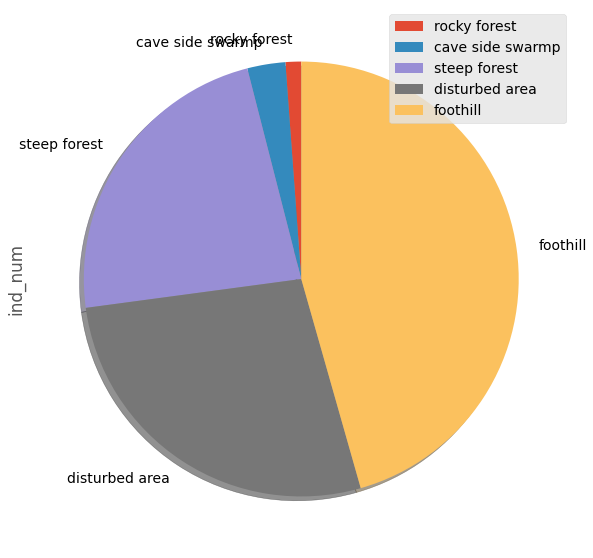

In [37]:
#make a pie chart to observe which area captured more individual
mount_khantan_df.groupby(['habitat_type']).sum().sort_values(by='ind_num',ascending=True).plot(kind='pie', y='ind_num',subplots=True, shadow = True,startangle=90,
figsize=(15,10))